In [1]:
# IMPORTING THE DATASETS USING IBM CLOUD snippet

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='TUbTOybp0yCKKuwbDRJN9vV0jTsGOTsBakXo-yqeBL8K',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'ibm2023-donotdelete-pr-w0iooznfnv6bcv'
object_key = 'All tiers data (1).csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head()


EndpointConnectionError: Could not connect to the endpoint URL: "https://s3.private.eu-gb.cloud-object-storage.appdomain.cloud/ibm2023-donotdelete-pr-w0iooznfnv6bcv/All%20tiers%20data%20%281%29.csv"

In [ ]:
#....................                                                             Exploratory Data Analysis part:

In [40]:
# Get the shape of the DataFrame
df.shape

(135, 22)

In [41]:
# Count the missing values in each column
df.isnull().sum()

s_id                                 0
name                               135
profile_link                         1
tier                                 0
gender                               0
branch                               0
cgpa                                 9
inter_gpa                           56
ssc_gpa                             55
internships                          0
no_of_projects                       0
is_participate_hackathon             0
is_participated_extracurricular      0
no_of_programming_languages          0
dsa                                  0
mobile_dev                           0
web_dev                              0
Machine Learning                     0
cloud                                0
other_skills                       114
is_placed                            0
salary_as_fresher                    0
dtype: int64

In [42]:
# Calculate the correlation matrix
df.corr()

,s_id,name,tier,cgpa,inter_gpa,ssc_gpa,internships,no_of_projects,is_participate_hackathon,is_participated_extracurricular,no_of_programming_languages,dsa,mobile_dev,web_dev,Machine Learning,cloud,is_placed,salary_as_fresher
s_id,1.000000,NaN,0.416145,-0.615522,-0.011070,-0.011057,-0.571853,-0.554007,-0.430518,-0.322978,-0.637097,-0.540625,-0.242055,-0.385694,-0.402648,-0.093952,-0.612236,-0.578762
name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tier,0.416145,NaN,1.000000,-0.186697,0.248959,0.113419,-0.394872,-0.314810,-0.522666,-0.393840,-0.488014,-0.574051,-0.110535,-0.319985,-0.353230,-0.015532,-0.367033,-0.613388
cgpa,-0.615522,NaN,-0.186697,1.000000,0.148331,0.143186,0.644682,0.595280,0.466105,0.364381,0.652045,0.388236,0.115496,0.430604,0.475657,0.096826,0.758116,0.642630
inter_gpa,-0.011070,NaN,0.248959,0.148331,1.000000,0.698416,-0.088200,0.042422,-0.184157,-0.212064,0.063893,-0.159064,-0.053861,0.130089,-0.120836,-0.045910,0.205060,-0.050966
ssc_gpa,-0.011057,NaN,0.113419,0.143186,0.698416,1.000000,0.034795,0.009116,-0.086462,-0.114133,0.029493,-0.076045,-0.027275,0.159961,-0.060540,-0.028587,0.132383,-0.005867
internships,-0.571853,NaN,-0.394872,0.644682,-0.088200,0.034795,1.000000,0.599351,0.534943,0.439932,0.554257,0.482184,0.063632,0.434720,0.509953,0.146101,0.624174,0.597265
no_of_projects,-0.554007,NaN,-0.314810,0.595280,0.042422,0.009116,0.599351,1.000000,0.415647,0.334522,0.682428,0.473637,0.101808,0.441392,0.614728,0.051292,0.612030,0.530914
is_participate_hackathon,-0.430518,NaN,-0.522666,0.466105,-0.184157,-0.086462,0.534943,0.415647,1.000000,0.469728,0.520692,0.611526,0.158523,0.338518,0.410889,0.054571,0.408413,0.546717
is_participated_extracurricular,-0.322978,NaN,-0.393840,0.364381,-0.212064,-0.114133,0.439932,0.334522,0.469728,1.000000,0.273130,0.389156,0.039043,0.227784,0.324808,-0.063778,0.289946,0.369472


In [45]:
# Access the column labels
df.columns


Index(['s_id', 'name', 'profile_link', 'tier', 'gender', 'branch', 'cgpa',
       'inter_gpa', 'ssc_gpa', 'internships', 'no_of_projects',
       'is_participate_hackathon', 'is_participated_extracurricular',
       'no_of_programming_languages', 'dsa', 'mobile_dev', 'web_dev',
       'Machine Learning', 'cloud', 'other_skills', 'is_placed',
       'salary_as_fresher'],
      dtype='object')

In [47]:
# Since the columns 's_id', 'name', 'gender', and 'salary_as_fresher' are not directly related to the prediction target,
# we can drop them as they don't contribute to the prediction process.
# Dropping specified columns that are not needed for prediction

df.drop(columns=['s_id','profile_link','name', 'gender', 'salary_as_fresher'], inplace=True)


In [48]:
#After droping the columns Checking how many columns values are having null values 

df.isnull().sum()

tier                                 0
branch                               0
cgpa                                 9
inter_gpa                           56
ssc_gpa                             55
internships                          0
no_of_projects                       0
is_participate_hackathon             0
is_participated_extracurricular      0
no_of_programming_languages          0
dsa                                  0
mobile_dev                           0
web_dev                              0
Machine Learning                     0
cloud                                0
other_skills                       114
is_placed                            0
dtype: int64

In [49]:
# Fill missing values in 'inter_gpa' column with the mean of non-missing values
# This replaces the missing value with the mean of the available 'inter_gpa' values.

df['inter_gpa'] = df['inter_gpa'].fillna(df['inter_gpa'].mean())

# Fill missing values in 'ssc_gpa' column with the mean of non-missing values
# No missing values in 'ssc_gpa', so this step doesn't change the column.

df['ssc_gpa'] = df['ssc_gpa'].fillna(df['ssc_gpa'].mean())

# Fill missing values in 'cgpa' column with the mean of non-missing values
# This replaces the missing value with the mean of the available 'cgpa' values.

df['cgpa'] = df['cgpa'].fillna(df['cgpa'].mean())

<AxesSubplot:>

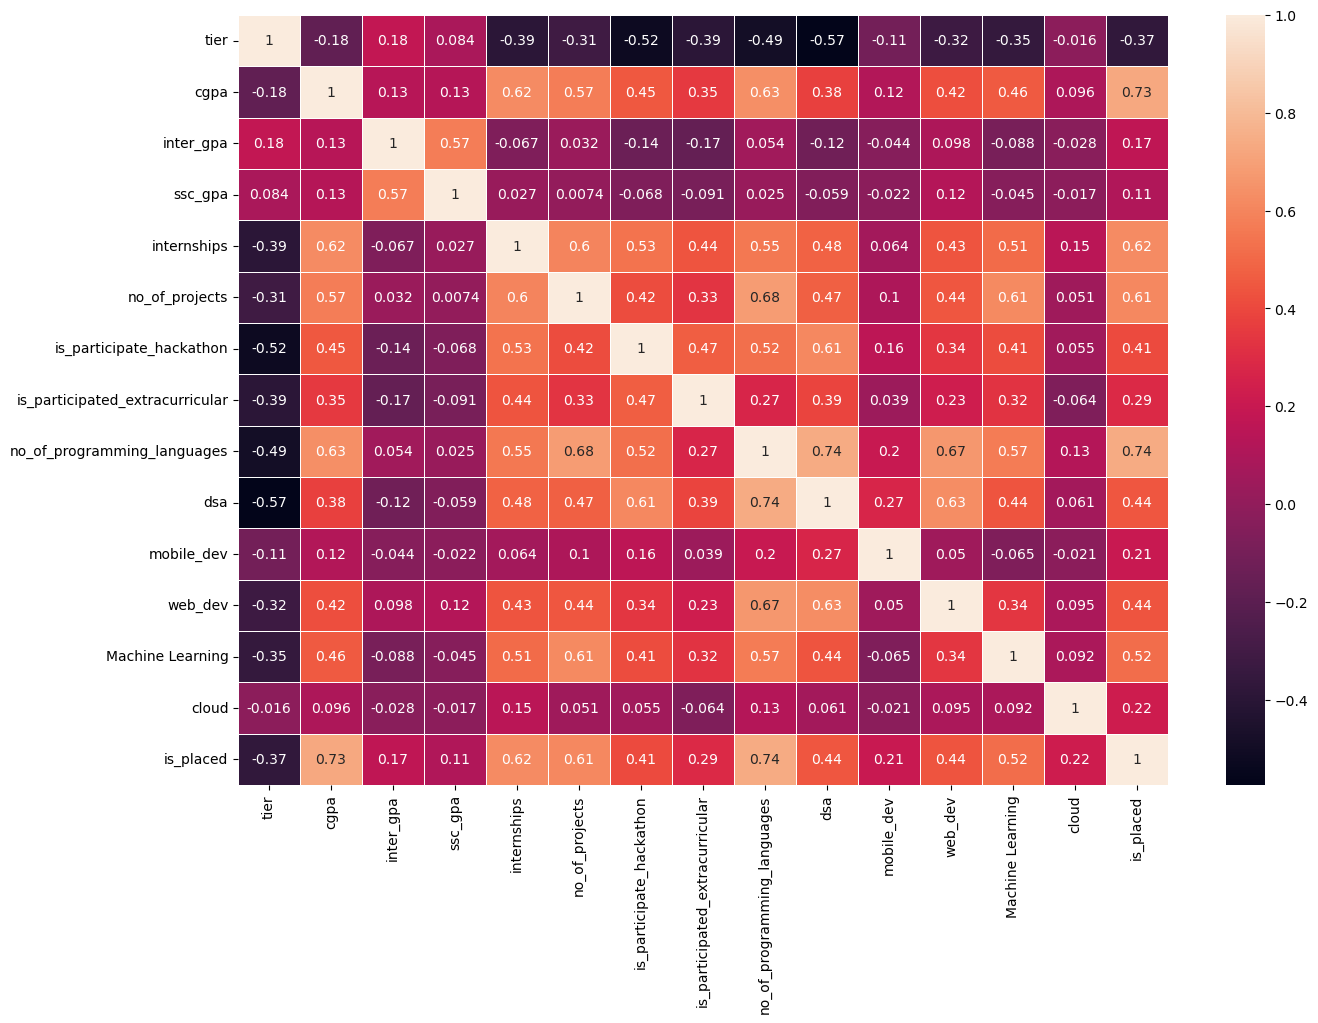

In [50]:
import seaborn as sea
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Create a heatmap to visualize the correlation matrix of the DataFrame
# This heatmap provides a graphical representation of the correlations between numeric columns in the DataFrame.
# Each cell color indicates the strength and direction of the correlation between two variables.

sea.heatmap(df.corr(), annot=True, linewidth=0.5)


In [51]:
# Assuming 'df' is a DataFrame containing data including a 'branch' column
# Perform one-hot encoding (dummy encoding) on the 'branch' column
# This converts categorical data into a binary matrix representation, creating new columns for each unique category.

dummy = pd.get_dummies(df.branch)

In [52]:
# Assuming 'df' is a DataFrame containing data, and 'dummy' is a DataFrame obtained from one-hot encoding
# Concatenate the original DataFrame 'df' with the one-hot encoded DataFrame 'dummy'
# This combines the original data with the one-hot encoded binary columns, adding them as new columns.

df = pd.concat([df, dummy], axis=1)

In [57]:
# Drop the 'EEE' column along with the 'branch' column
# This is done to avoid the dummy variable trap that can arise when using one-hot encoding.
# Dropping one category column (e.g., 'EEE') ensures linear independence among the encoded columns.

df.drop(columns=['EEE', 'branch'], inplace=True)
df.drop(columns=['other_skills'],inplace=True)

In [58]:
df.isnull().sum()

tier                               0
cgpa                               0
inter_gpa                          0
ssc_gpa                            0
internships                        0
no_of_projects                     0
is_participate_hackathon           0
is_participated_extracurricular    0
no_of_programming_languages        0
dsa                                0
mobile_dev                         0
web_dev                            0
Machine Learning                   0
cloud                              0
is_placed                          0
CSE                                0
ECE                                0
IT                                 0
MECH                               0
dtype: int64

In [59]:
df['is_placed']=df['is_placed'].astype(int)
# Loading the Independent features into X variable
X=df.drop(columns=['is_placed'])

In [60]:
# Loading Target column into the y varible
y=df['is_placed']
y

0      1
1      1
2      1
3      1
4      1
      ..
130    0
131    0
132    0
133    0
134    0
Name: is_placed, Length: 135, dtype: int64

In [61]:
# Split the dataset into training and testing sets
# X_train: Features for training
# X_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing
# The 'test_size' parameter defines the proportion of the dataset that becomes the testing set.
# In this case, 20% of the data is allocated to the testing set, and the remaining 80% is used for training.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [62]:
from sklearn.ensemble import RandomForestClassifier
Random_forest_model=RandomForestClassifier()

In [63]:
X_train.head()

,tier,cgpa,inter_gpa,ssc_gpa,internships,no_of_projects,is_participate_hackathon,is_participated_extracurricular,no_of_programming_languages,dsa,mobile_dev,web_dev,Machine Learning,cloud,CSE,ECE,IT,MECH
55,1,8.8,9.400000,9.70000,1,3,1,1,2,0,0,0,0,0,0,0,0,1
80,1,8.7,12.205063,10.55375,1,4,1,0,4,1,0,1,1,0,1,0,0,0
84,1,9.5,9.500000,10.00000,1,5,1,1,5,1,0,1,1,0,1,0,0,0
112,3,8.0,12.205063,10.55375,2,4,0,1,2,0,0,0,1,0,1,0,0,0
97,3,5.0,7.400000,8.50000,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [64]:
y_train

55     1
80     1
84     1
112    1
97     0
      ..
101    0
109    1
77     1
28     1
57     1
Name: is_placed, Length: 108, dtype: int64

In [65]:
Random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
Random_forest_model.score(X_train,y_train)

1.0

In [68]:
output = Random_forest_model.predict(X_test)

In [24]:
output

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1])

In [69]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [73]:
# Create a dictionary containing different classification models
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier()
}

# Loop through each model in the dictionary
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate performance metrics for training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)

    # Calculate performance metrics for testing set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)

    # Print model performance metrics
    print('\n')
    print(model_name)
    print("=" * 15)
    
    # Print performance metrics for training set
    print("Performance of the model on training set:")
    print('-', "Accuracy =", model_train_accuracy * 100)
    print('-', "F1 Score =", model_train_f1 * 100)
    print('-', "Precision =", model_train_precision * 100)

    print('\n')
    # Print performance metrics for testing set
    print("Performance of the model on testing set:")
    print('-', "Accuracy =", model_test_accuracy * 100)
    print('-', "F1 Score =", model_test_f1 * 100)
    print('-', "Precision =", model_test_precision * 100)

    print("=" * 40)


/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




LogisticRegression
Performance of the model on training set:
- Accuracy = 95.37037037037037
- F1 Score = 96.73202614379085
- Precision = 96.1038961038961


Performance of the model on testing set:
- Accuracy = 100.0
- F1 Score = 100.0
- Precision = 100.0


RandomForestClassifier
Performance of the model on training set:
- Accuracy = 100.0
- F1 Score = 100.0
- Precision = 100.0


Performance of the model on testing set:
- Accuracy = 96.29629629629629
- F1 Score = 97.2972972972973
- Precision = 94.73684210526315


DecisionTree
Performance of the model on training set:
- Accuracy = 100.0
- F1 Score = 100.0
- Precision = 100.0


Performance of the model on testing set:
- Accuracy = 96.29629629629629
- F1 Score = 97.14285714285714
- Precision = 100.0


In [75]:
'''
Based on the provided performance metrics for each model, here's a summary of the results:

Logistic Regression Model:
------------------------------------------------------------------
The model performs well on both the training and testing sets.
Accuracy, F1 Score, and Precision are high on both sets.
'''
It shows good generalization to the testing data.
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [76]:
model.fit(X_train,y_train)

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
model.predict(X_test[:10])

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0])

In [78]:
df.head(10)

,tier,cgpa,inter_gpa,ssc_gpa,internships,no_of_projects,is_participate_hackathon,is_participated_extracurricular,no_of_programming_languages,dsa,mobile_dev,web_dev,Machine Learning,cloud,is_placed,CSE,ECE,IT,MECH
0,1,8.135556,12.205063,10.00000,2,5,1,1,4,1,0,1,1,0,1,1,0,0,0
1,1,8.135556,12.205063,10.00000,1,4,1,1,4,1,0,1,1,0,1,1,0,0,0
2,1,8.135556,12.205063,10.55375,1,5,1,1,5,1,0,1,1,0,1,1,0,0,0
3,1,9.590000,12.205063,10.00000,3,8,1,1,5,1,0,1,1,0,1,1,0,0,0
4,1,8.135556,12.205063,9.80000,3,4,1,1,3,1,0,1,1,0,1,1,0,0,0
5,1,8.310000,9.800000,10.00000,1,6,0,1,5,1,0,1,1,0,1,1,0,0,0
6,1,8.100000,9.000000,9.10000,0,6,0,1,4,1,0,1,1,0,1,1,0,0,0
7,1,8.900000,12.205063,9.70000,2,4,0,1,3,1,0,1,0,0,1,1,0,0,0
8,1,7.700000,12.205063,10.55375,1,4,0,1,4,1,0,1,1,0,1,1,0,0,0
9,1,9.520000,12.205063,10.55375,3,2,1,1,5,1,0,1,0,0,1,1,0,0,0


In [79]:
import numpy as np
X_test.columns

Index(['tier', 'cgpa', 'inter_gpa', 'ssc_gpa', 'internships', 'no_of_projects',
       'is_participate_hackathon', 'is_participated_extracurricular',
       'no_of_programming_languages', 'dsa', 'mobile_dev', 'web_dev',
       'Machine Learning', 'cloud', 'CSE', 'ECE', 'IT', 'MECH'],
      dtype='object')

In [81]:
# Saving the model
import pickle
pickle.dump(model,open('salary_model.pkl', 'wb'))

In [82]:
!pip install -U ibm-watson-machine-learning

In [85]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [86]:
# authenticate ans set space
wml_credentials={
    "apikey":"mXU6y4Gya8JF0NyNZC-ALe3L_2NxXB-vVULuRriTT_PA",
    "url":"https://eu-gb.ml.cloud.ibm.com"
}

In [87]:
wml_client=APIClient(wml_credentials)

In [88]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------------------  ------------------------
ID                                    NAME                  CREATED
98d205c3-7f14-4b96-9c8d-56d5b49fc57a  Salary_prediction     2023-08-26T14:01:31.184Z
533b833a-a4c6-4d55-921c-b42603766374  Placement_prediction  2023-08-24T16:33:22.454Z
------------------------------------  --------------------  ------------------------


,ID,NAME,CREATED
0,98d205c3-7f14-4b96-9c8d-56d5b49fc57a,Salary_prediction,2023-08-26T14:01:31.184Z
1,533b833a-a4c6-4d55-921c-b42603766374,Placement_prediction,2023-08-24T16:33:22.454Z


In [89]:
SPACE_ID="533b833a-a4c6-4d55-921c-b42603766374"

In [90]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [91]:
MODEL_NAME='placement'
DEPLOYMENT_NAME='deploy1'
BEST_MODEL=model

In [92]:
software_spec_uid= wml_client.software_specifications.get_id_by_name('runtime-22.2-py3.10')

In [93]:
model_pros={
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.1',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}

In [94]:
model_details = wml_client.repository.store_model(
    model=BEST_MODEL,
    meta_props=model_pros,
    training_data=X_train,
    training_target=y_train
)

In [95]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'is_placed',
  'schemas': {'input': [{'fields': [{'name': 'tier', 'type': 'int64'},
      {'name': 'cgpa', 'type': 'float64'},
      {'name': 'inter_gpa', 'type': 'float64'},
      {'name': 'ssc_gpa', 'type': 'float64'},
      {'name': 'internships', 'type': 'int64'},
      {'name': 'no_of_projects', 'type': 'int64'},
      {'name': 'is_participate_hackathon', 'type': 'int64'},
      {'name': 'is_participated_extracurricular', 'type': 'int64'},
      {'name': 'no_of_programming_languages', 'type': 'int64'},
      {'name': 'dsa', 'type': 'int64'},
      {'name': 'mobile_dev', 'type': 'int64'},
      {'name': 'web_dev', 'type': 'int64'},
      {'name': 'Machine Learning', 'type': 'int64'},
      {'name': 'cloud', 'type': 'int64'},
      {'name': 'CSE', 'type': 'uint8'},
      {'name': 'ECE', 'type': 'uint8'},
      {'name': 'IT', 'type': 'uint8'},
      {'name': 'MECH', 'type': 'uint8'}],
     'id': '1',
     'type': 'st

In [96]:
model_uid = wml_client.repository.get_model_id(model_details)
model_uid

'a9628e6b-e0fb-451f-8d52-94d599d1e008'

In [97]:
deployment_props={
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [98]:
placement_deploy = wml_client.deployments.create(
     artifact_uid = model_uid,
     meta_props=deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: 'a9628e6b-e0fb-451f-8d52-94d599d1e008' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='f266280b-2055-4112-8ad6-3facb3934342'
------------------------------------------------------------------------------------------------




In [99]:
import sklearn

In [100]:
sklearn.__version__

'1.1.1'